# Setup

In [1]:
import pandas as pd
import seaborn as sns

from src.profiling import profile_velour, load_profile_from_disk
from src.viz import plot_grouped_barchart

from velour.client import Client
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

LOCAL_HOST = "http://localhost:8000"
DATASET_NAME = 'profiling11'

# Run Profiler

In [2]:
client = Client(LOCAL_HOST)

results = profile_velour(
    client=client,
    dataset_name=DATASET_NAME,
    n_image_grid=[10000],
    n_annotation_grid=[2, 10],
    n_label_grid=[2],
    db_container_name= "velour-db-1",
    service_container_name = "velour-service-1",
)

Succesfully connected to http://localhost:8000/.
Profiling _setup_dataset with args {'client': <velour.client.Client object at 0x127361e90>, 'dataset_name': 'profiling11', 'n_images': 10000, 'n_annotations': 2, 'n_labels': 2}


 44%|████▍     | 4405/10000 [17:39<21:17,  4.38it/s]   

# Analyze Results

In [2]:
file_to_load = 'profiling4'

results = load_profile_from_disk(file_to_load)

df = pd.DataFrame.from_records(results)
df['total_runtime_minutes'] = df['total_runtime_seconds'] / 60
df.columns

Index([                   'client',              'dataset_name',
                        'n_images',             'n_annotations',
                        'n_labels',                     'start',
           'total_runtime_seconds',                           0,
                                 1,                           2,
                                 3,                           4,
                                 5,                           6,
                                 7,                           8,
                                 9,                 'exception',
             'servicememory_usage',       'servicememory_limit',
                'servicecpu_usage',   'servicecpu_usage_kernel',
           'servicecpu_usage_user',   'servicecpu_usage_system',
       'servicecpu_throttled_time',            'dbmemory_usage',
                  'dbmemory_limit',               'dbcpu_usage',
              'dbcpu_usage_kernel',          'dbcpu_usage_user',
              'dbcpu_usag

## Total Runtime

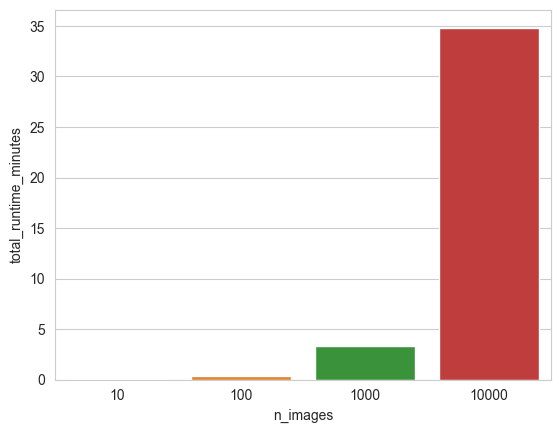

In [3]:
plot_grouped_barchart(df=df, x="n_images", y="total_runtime_minutes", hue=None)


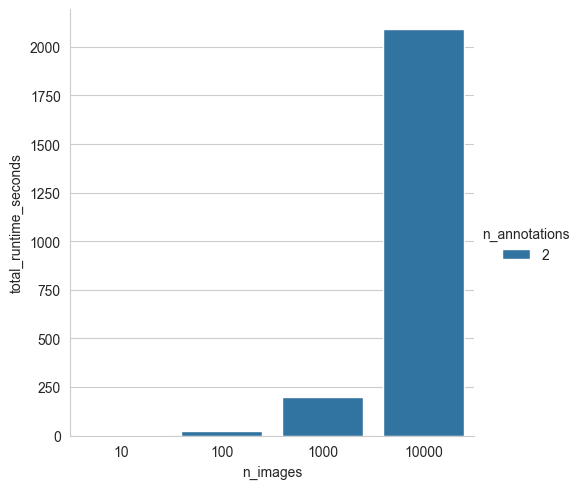

In [11]:
# NOTE: expected to not show any variance yet. need to test different annotation sizes via profiler
plot_grouped_barchart(
    df=df, x="n_images", y="total_runtime_seconds", hue="n_annotations"
)

## Docker Stats

### Service Container

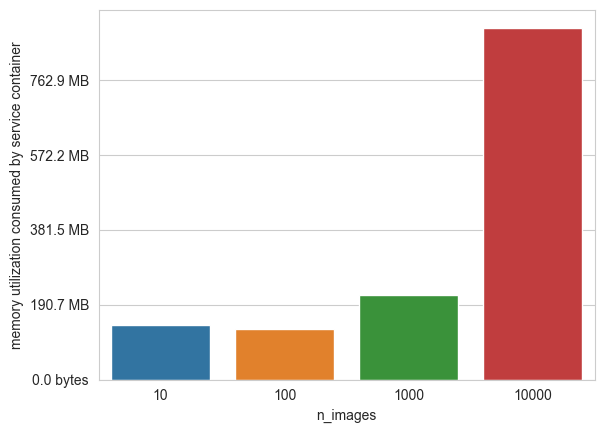

In [5]:
plot_grouped_barchart(df=df, x="n_images", y="servicememory_usage", hue=None, convert_bytes=True, y_axis_label='memory utilization consumed by service container')


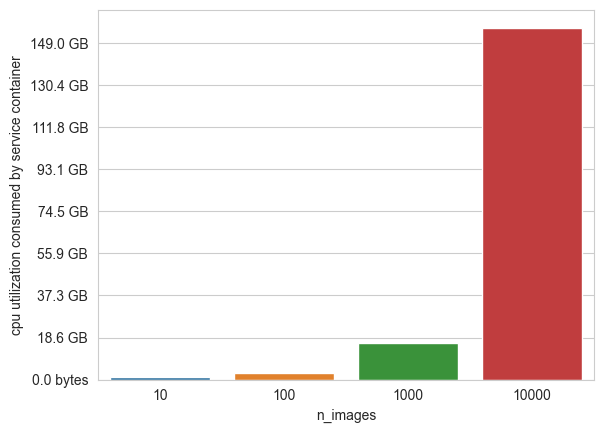

In [6]:
plot_grouped_barchart(df=df, x="n_images", y="servicecpu_usage", hue=None, convert_bytes=True, y_axis_label='cpu utilization consumed by service container')


In [ ]:
# NOTE: coming on next profiler run
plot_grouped_barchart(df=df, x="n_images", y="servicecpu_usage_perc", hue=None, convert_bytes=True, y_axis_label='cpu utilization percentage consumed by service container')

### DB Container

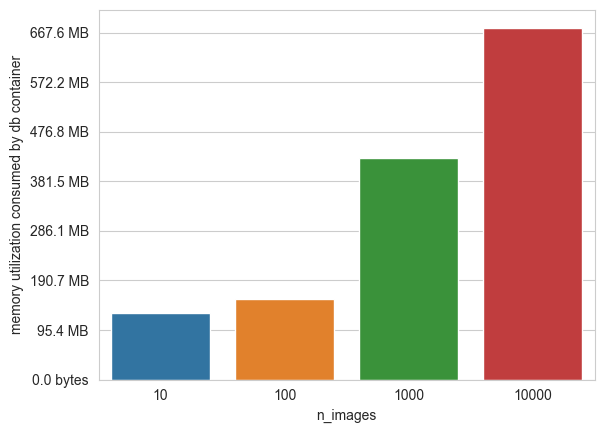

In [9]:
plot_grouped_barchart(df=df, x="n_images", y="dbmemory_usage", hue=None, convert_bytes=True, y_axis_label='memory utilization consumed by db container')

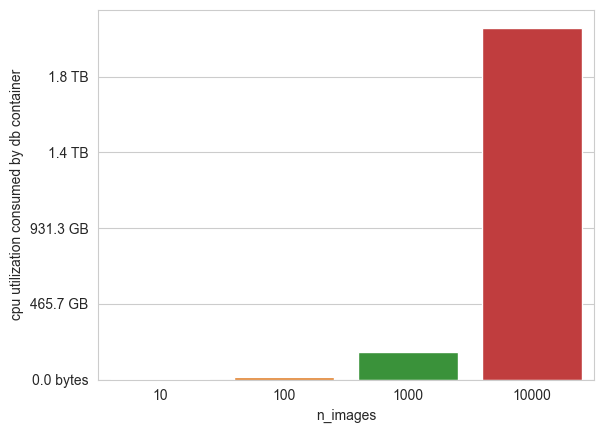

In [15]:
plot_grouped_barchart(df=df, x="n_images", y="dbcpu_usage", hue=None, convert_bytes=True, y_axis_label='cpu utilization consumed by db container')


In [ ]:
# NOTE: coming on next profiler run
plot_grouped_barchart(df=df, x="n_images", y="dbcpu_usage_perc", hue=None, convert_bytes=True, y_axis_label='cpu utilization percentage consumed by db container')

## Top 10 Memory Trace Detractors

In [12]:
# NOTE: future iterations will filter out */profiling.py
[(dct['filename'], dct['size'], dct['count']) for i in range(10) for dct in df[0]]

[('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 832, 2),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 2000, 4),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 3168, 6),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 4336, 8),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 832, 2),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 2000, 4),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 3168, 6),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 4336, 8),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 832, 2),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 2000, 4),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 3168, 6),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 4336, 8),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 832, 2),
 ('/Users/nthorlind/git/sw/velour/utils/src/profiling.py', 2000, 4),
 ('/Users/nthorlind/git/sw/velour/util